In [1]:
from scipy.io import loadmat
import numpy as np 
import matplotlib.pyplot as plt

# Part 1

In [2]:
H = loadmat('data/H.mat')['H']
x = loadmat('data/x.mat')['x']
G = loadmat('data/G.mat')['G']

In [3]:
hx = H@x
y = hx + np.random.normal(size = hx.shape, scale=1)

In [4]:
y_view = y.reshape((90,180), order='F')
x_view = x.reshape((90,90), order='F')

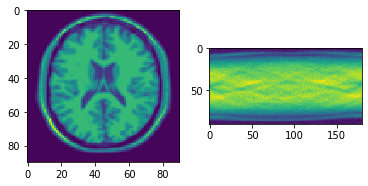

In [5]:
fg , ax = plt.subplots(1,2)
ax[0].imshow(x_view)
ax[1].imshow(y_view)

# Part 2

In [6]:
def f(x, y ,r, lambda_) : 
    return(1/2 * np.linalg.norm(H@x - y, ord=2) + labmda_ * r(x))

In [7]:
lambda_ , delta = 0.13, 0.02

In [8]:
def grad_f(x) : 
    return(H.T @ (H @ x) - H.T @ y + lambda_ * G.T @ grad_psi(G @ x))

def grad_psi(u, delta=delta): 
    return(u / ( delta ** 2 * np.sqrt(1 + u ** 2 / ( delta ** 2 ))))

def h(x): 
    
    return(f(x_n) + np.dot(grad_f(x_n), x - x_n) + 1/2 * np.sqrt(np.dot(x - x_n, A @ (x - x_n))))

## Gradient Descent Algorithm 

In [9]:
M, N = 90 * 180, 90 * 90 
x_0 = np.zeros((N,1))

In [10]:
x_0

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [29]:
learning_rate = 1e-4 ## switch to numerical expression of the lipshitz constant of the gradient 
grad_norms = []
x_n = x_0.copy()
converged = False
it = 0
while not converged : 
    grad = grad_f(x_n)
    x_n -= learning_rate * grad
    update_norm = np.sum(np.abs(x_n_ - x_n))
    update_norms.append(update_norm)
    if np.sum(np.abs(x_n_ - x_n)) < 1e-6 * np.sum(np.abs(x_n)) : 
        converged = True
    x_n_ = x_n.copy()
    if it % 10 == 0: 
        print(update_norm)
    it+=1

1981.965489951572
32.64591116213953
13.684743320496205
8.038646736171877
5.319955310869883
3.7470120459951546
2.75007324733592
2.0806376252876166
1.6113409507487748
1.2740111960193496
1.0279165746365377
0.8453896600274506
0.7078371796067331
0.6023932581154721
0.519403366241946
0.45196642778649665
0.3963075617402141
0.34994145558051337
0.31086400771192724
0.27767459434275865
0.24931759422986394
0.22480240584096373
0.2034359544022277
0.18463063347393877
0.1680586413221626
0.15336141326545238
0.14021986026175337
0.12844888777038382
0.11793235575171437
0.10848407654838499
0.10000061175329239
0.09232533154291407
0.08536406121280549
0.07905228777276661
0.07331536182336842
0.06809150698269878
0.06330588217999512
0.058924049328605836
0.0549115183714431
0.05121853707635197
0.047818521166909225
0.044685836444543964
0.04179221946899882
0.03911974962994008
0.036643316600042775
0.03435170960587307
0.032229479452189805
0.030260479121731524
0.028432173363969013
0.02673336338896951
0.02515635875957394

In [12]:
delta

0.02

## MM quadratic algorithm

In [13]:
from scipy.io import loadmat
from scipy.sparse.linalg import svds, bicg, inv, LinearOperator
from scipy.sparse import diags
from scipy.linalg import pinv

In [14]:
diags((grad_psi(x)/x).flatten()).tocsc()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<8100x8100 sparse matrix of type '<class 'numpy.float64'>'
	with 8100 stored elements in Compressed Sparse Column format>

In [57]:
def big_delta(x, eps = 1e-10):
    return diags((grad_psi(x)/(x+eps)).flatten()).tocsc()


In [59]:
update_norms = []
x_n = x_0.copy()
converged = False
x_n_ = x_n.copy()
while not converged : 
    
    grad = grad_f(x_n)
    A_x = lambda x : (H.T.dot(H.dot(x)) + lambda_ * G.T.dot(big_delta(G.dot(x_n)).dot(G.dot(x))))
    A = LinearOperator((N,N),matvec = A_x, rmatvec = A_x)
    x_n_ = x_n - bicg(A, grad, tol=1e-3)[0].reshape(-1, 1)
    update_norm = np.sum(np.abs(x_n_ - x_n))
    update_norms.append(update_norm)
    if np.sum(np.abs(x_n_ - x_n)) < 1e-6 * np.sum(np.abs(x_n)) : 
        converged = True
    x_n = x_n_.copy()
    if it % 10 == 0: 
        print(update_norm)
    it+=1

2.5883110010523787
0.2875317342224987
0.05963043356623782
0.015953168686499628
0.004826540947460139
